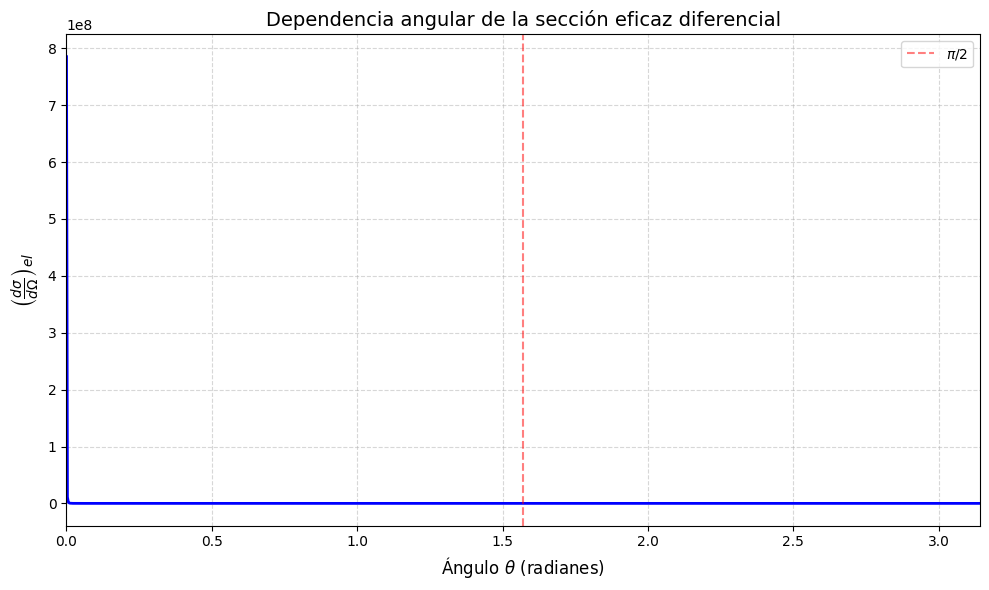

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos la función de la sección eficaz diferencial
def differential_cross_section(theta, gamma, E):
    """Calcula la sección eficaz diferencial para ángulos theta (en radianes)"""
    numerator = gamma * np.pi**2 * (np.pi - theta)
    denominator = E * np.sin(theta) * theta**2 * (2*np.pi - theta)**2
    return numerator / denominator

# Parámetros (puedes ajustar estos valores según necesites)
gamma = 1.0  # Constante gamma (ajustar según el sistema físico)
E = 1.0      # Energía (ajustar según el sistema físico)

# Creamos un array de ángulos theta en radianes, evitando theta=0 y theta=pi
theta = np.linspace(0.001, np.pi-0.001, 1000)

# Calculamos la sección eficaz
cross_section = differential_cross_section(theta, gamma, E)

# Creamos la gráfica
plt.figure(figsize=(10, 6))
plt.plot(theta, cross_section, 'b-', linewidth=2)
plt.title('Dependencia angular de la sección eficaz diferencial', fontsize=14)
plt.xlabel('Ángulo $\\theta$ (radianes)', fontsize=12)
plt.ylabel('$\\left(\\frac{d\\sigma}{d\\Omega}\\right)_{el}$', fontsize=14)
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.xlim(0, np.pi)

# Opcional: agregar líneas verticales en puntos importantes
plt.axvline(x=np.pi/2, color='r', linestyle='--', alpha=0.5, label='$\\pi/2$')
plt.legend()

# Mostrar la gráfica
plt.tight_layout()
plt.show()

/var/folders/64/rr6ng52166s5wp9_lwq2nnx40000gn/T/ipykernel_31514/2026182971.py:46: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, None)  # Ajustar según necesidad


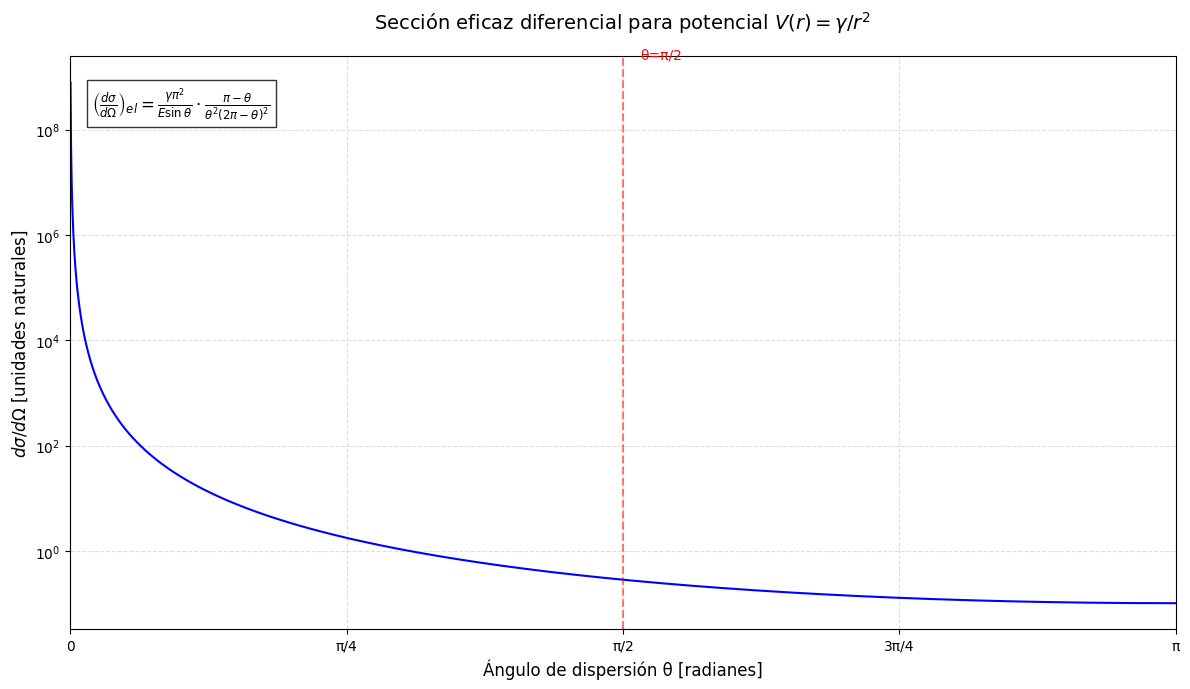

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# Definición de la función de sección eficaz diferencial
def differential_cross_section(theta, gamma, E):
    """Calcula la sección eficaz diferencial para el potencial V(r) = γ/r²"""
    # Evitamos divisiones por cero en theta=0 y theta=pi
    with np.errstate(divide='ignore', invalid='ignore'):
        term1 = gamma * np.pi**2 / (E * np.sin(theta))
        term2 = (np.pi - theta) / (theta**2 * (2*np.pi - theta)**2)
        result = term1 * term2
    
    # Reemplazamos posibles infinitos o NaN con ceros para la gráfica
    result = np.nan_to_num(result, nan=0.0, posinf=0.0, neginf=0.0)
    return result

# Parámetros físicos (unidades naturales)
gamma = 1.0  # Parámetro del potencial [unidades de energía × longitud²]
E = 1.0      # Energía de las partículas incidentes [unidades de energía]

# Rango angular: de 0 a π radianes (evitando los extremos exactos)
theta_rad = np.linspace(0.001, np.pi-0.001, 2000)

# Calculamos la sección eficaz
cross_section = differential_cross_section(theta_rad, gamma, E)

# Configuración de la gráfica
plt.figure(figsize=(12, 7))
plt.semilogy(theta_rad, cross_section, 'b-', linewidth=1.5, 
             label=f'γ = {gamma}, E = {E}')

# Añadimos línea en θ=π/2 como referencia
plt.axvline(x=np.pi/2, color='r', linestyle='--', alpha=0.5)
plt.text(np.pi/2+0.05, 0.9*plt.ylim()[1], 'θ=π/2', color='r')

# Configuración de ejes y título
plt.title('Sección eficaz diferencial para potencial $V(r) = \\gamma/r^2$', 
          fontsize=14, pad=20)
plt.xlabel('Ángulo de dispersión θ [radianes]', fontsize=12)
plt.ylabel('$dσ/dΩ$ [unidades naturales]', fontsize=12)
plt.grid(True, which='both', linestyle='--', alpha=0.4)

# Escala y límites
plt.xlim(0, np.pi)
plt.ylim(0, None)  # Ajustar según necesidad

# Marcadores especiales en el eje x
plt.xticks([0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi],
           ['0', 'π/4', 'π/2', '3π/4', 'π'])

# Incluimos la ecuación en la gráfica
eq_text = r'$\left(\frac{d\sigma}{d\Omega}\right)_{el} = \frac{\gamma \pi^2}{E \sin \theta} \cdot \frac{\pi - \theta}{\theta^2 (2\pi - \theta)^2}$'
plt.text(0.02, 0.95, eq_text, transform=plt.gca().transAxes, 
         fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()
